In [1]:
# Installing the libraries
!pip install pandas -q
!pip install tabulate -q
!pip install seaborn -q
!pip install matplotlib -q
!pip install scikit-learn -q

# Data Load

In [2]:
import pandas as pd

# Loading the dataset
file_path = "../Dataset/final_depression_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


# Basic Data Exploration

In [1]:
from matplotlib import rcParams

dpi = 200
maxpix = 670
width = maxpix / dpi
rcParams.update({
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'legend.fontsize': 'x-small',
    'legend.frameon': False,
    'font.serif': ['Computer Modern', 'Helvetica', 'Arial', 'Tahoma', 'Lucida Grande', 'DejaVu Sans'],
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.figsize': [0.4*width, 0.3*width],
    'figure.dpi': dpi,
    'text.color': "black",
    'axes.labelcolor': "black",
    'axes.facecolor': 'white',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'figure.facecolor': 'none',
    'lines.linewidth': .75,
    'xtick.top': True,
    'ytick.right': True,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
})

Number of surveys: 2556
Number of features/columns: 18
Number of Depressed people: 455
Number of Not Depressed people: 2101


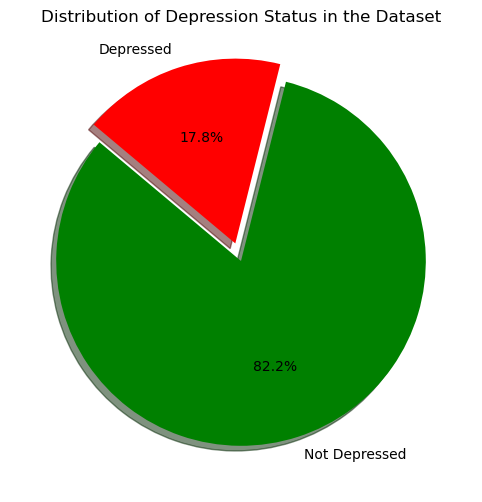

In [7]:
import matplotlib.pyplot as plt

def explore_dataset_with_plot(df):
    """
    Function to explore the dataset.
    Prints the number of surveys, number of features, and counts of depressed and non-depressed individuals.
    Additionally, plots a pie chart of the depression counts.
    """
    num_surveys = df.shape[0]
    num_features = df.shape[1]
    num_depressed = df[df['Depression'] == 'Yes'].shape[0]
    num_not_depressed = df[df['Depression'] == 'No'].shape[0]

    print(f"Number of surveys: {num_surveys}")
    print(f"Number of features/columns: {num_features}")
    print(f"Number of Depressed people: {num_depressed}")
    print(f"Number of Not Depressed people: {num_not_depressed}")

    # Pie chart
    labels = ['Not Depressed', 'Depressed']
    sizes = [num_not_depressed, num_depressed]
    colors = ['green', 'red']
    explode = (0, 0.1)

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Distribution of Depression Status in the Dataset')
    plt.show()

explore_dataset_with_plot(df)

In [15]:
column_name = "Gender"
df[column_name].value_counts()

Male      1333
Female    1223
Name: Gender, dtype: int64

In [19]:
df.groupby(column_name)['Depression'].value_counts()

Gender  Depression
Female  No            1009
        Yes            214
Male    No            1092
        Yes            241
Name: Depression, dtype: int64

In [21]:
52*0.05

2.6

In [29]:
def analyze_category_with_depression_improved(df, column_name, chart_title, fig_size, bar_figsize, pie_colors, bar_colors, ylim):

    # Univariate analysis: Value counts and percentages
    value_counts = df[column_name].value_counts()
    percentages = (value_counts / value_counts.sum()) * 100

    # Bivariate analysis: Depression status within each category
    depression_counts = df.groupby(column_name)['Depression'].value_counts().unstack(fill_value=0)
    depression_percentages = (depression_counts.T / depression_counts.sum(axis=1)).T * 100

    # Combine tables and adjust columns
    combined_df = pd.concat([value_counts, percentages.round(2), depression_counts, depression_percentages.round(2)], axis=1)
    combined_df.columns = ['Total Count', 'Total Percentage', 'No Depression Count', 'Yes Depression Count',
                           'No Depression Percentage', 'Yes Depression Percentage']
    combined_df.drop(columns=['No Depression Percentage'], inplace=True)  # Dropping No Depression Percentage column

    # Print table in markdown format with better column names
    print(combined_df.to_markdown())

    # Explode smaller slices more for visibility
    explode_values = (0.05 * (percentages / percentages.max())).round(2).values

    # Plotting the pie chart for category distribution
    plt.figure(figsize=(fig_size[0], fig_size[1]))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=pie_colors, startangle=140, shadow=True, explode=explode_values)
    plt.title(f'{chart_title} Distribution')

    # Plotting the bar chart for percentage of depressed in each category
    plt.figure(figsize=(bar_figsize[0], bar_figsize[1]))
    depression_percentages['Yes'].plot(kind='bar', color=bar_colors, ylim=ylim)
    plt.xlabel(column_name)
    plt.ylabel('Percentage Depressed')
    plt.title(f'Depression Rate by {chart_title}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

|        |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|:-------|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
| Male   |          1333 |              52.15 |                  1092 |                    241 |                       18.08 |
| Female |          1223 |              47.85 |                  1009 |                    214 |                       17.5  |


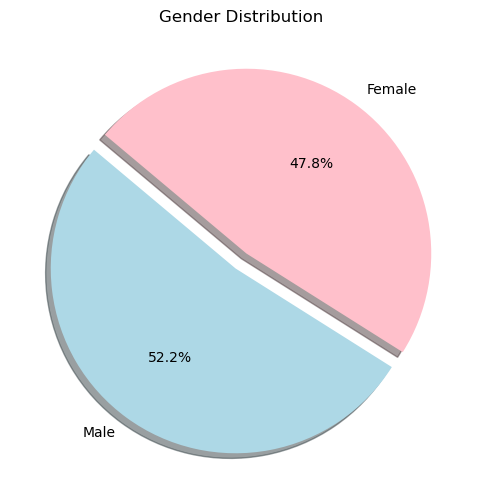

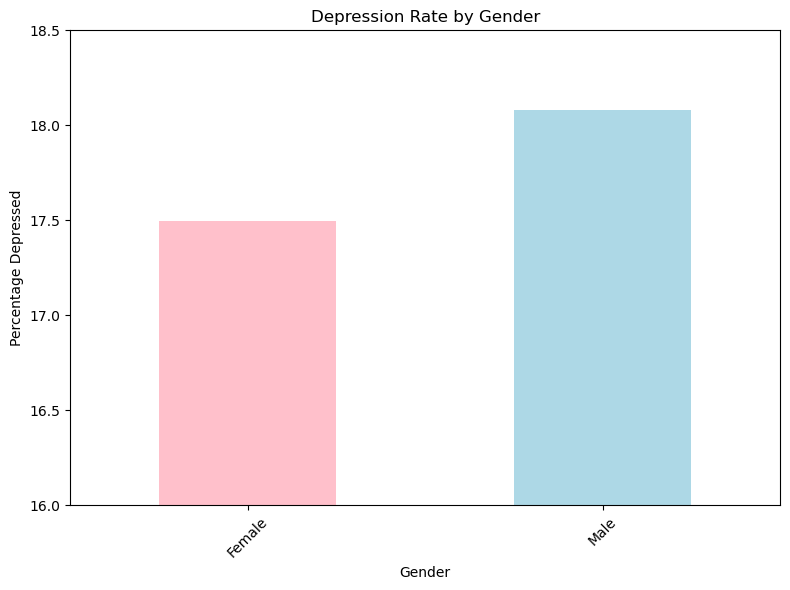

In [31]:
analyze_category_with_depression_improved(
    df, 
    'Gender', 
    'Gender', 
    (6, 6), 
    (8, 6), 
    ['lightblue', 'pink'], 
    ['pink', 'lightblue'], 
    (16, 18.5)
)